# EXERCISE 3 AND ITS VARIATIONS #

# PART-1 LINEAR REGRESSION ON TIME SERIES DATA #

In this part, you are required to optimize the booth function using gradient descent. The Figure below provides a visual representation of the booth function in a 3D plot.

Mathematically, the function can be defined as follows.
f(x,y)=(x+2y)2 +(2x+y−5)2

For this part of the exercise,
1. Implement a 3D plot to visualize the function (Use Matplotlib’s 3D utilities)
2. Derive the partial gradients.
3. Optimize the function with Gradient Descent. Set the appropriate hyperparameters like initial values of (x,y) and the steplength α through trial and error.
4. Visualize the trajectory on the same 3D plot. This trajectory should ideally lead to the function minimum. Try to plot the trajectory in a for loop so that the path taken is visible.
5. Implement the function that controls the step length 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Booth function
def booth(x, y):
    return (x + 2*y)**2 + (2*x + y - 5)**2

# Partial derivatives
def derv_fx(x, y):
    return 2*(x + 2*y) + 2*(2*x + y - 5)*2

def derv_fy(x, y):
    return 2*(x + 2*y)*2 + 2*(2*x + y - 5)

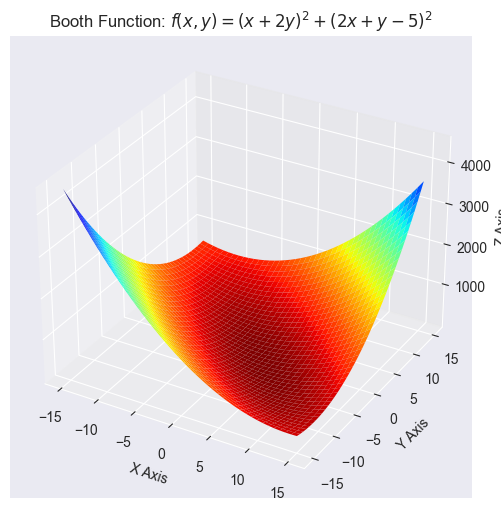

In [2]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
reso = 42
X = np.linspace(-15, 15, reso)
Y = np.linspace(-15, 15, reso)
X, Y = np.meshgrid(X, Y)
Z = booth(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap='jet_r',
                       linewidth=0, antialiased=True)

#Part-1
# Adding labels to the axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Booth Function: $f(x, y)=(x+2 y)^2+(2 x+y-5)^2$')

plt.show()

2. To find values of x and y which minimizes this function can be computed by taking the partial derivative of the function with respect to x and y
\
\
The partial derivative with respect to x is given as,
\
$f(x)^{\prime}=2(x+2 y) +2(2 x+y-5) \cdot 2 $
\
\
The partial derivative with respect to y is given as,
\
$f(y)^{\prime}=2(x+2 y) \cdot 2 +2(2 x+y-5) $

In [3]:
def gradient_decent_booth(x,y,alpha):
    iterations = 0 ## for calculating number of iterations
    step_x = 1 ## arbitrary step length to start the loop for x
    step_y = 1 ## arbitrary step length to start the loop for y
    max_iter = 100 ## maximum iterations
    z_val = [booth(x,y)] #Tos tore the Z value/booth value as we optimize the function
    x_val = [x]
    y_val = [y]
    while (np.abs(step_x) > 1e-6) or (np.abs(step_y) > 1e-6): #iterate until the value of function stops changing below 1e-6 

        #to stop our optimization if the function stops converging after certain number of iterations
        if iterations > max_iter:
            break

        ## for calculating steps wrt both x and y
        step_x = -alpha*derv_fx(x,y)
        step_y = -alpha*derv_fy(x,y)

        ## for minimizing x,y
        x = x + step_x
        y = y + step_y

        ## increment the iteration
        iterations += 1
        x_val.append(x)
        y_val.append(y)
        z_val.append(booth(x,y))

    return x,y,iterations,z_val,(x_val,y_val)

In [4]:
minimum = np.inf
for n in range(10): #number of trials and error steps
    x = -10 #given x value
    y = 5 #give y value
    lrs = [0.01,0.1,0.2,0.5] #bunch of practical random learning rates
    lr = lrs[np.random.randint(0,4,1)[0]] #pick a random lr from our given list of lr

    x, y, iterations, z, _ = gradient_decent_booth(x,y,lr) #gradient descent step
    new_f = z[-1] #new value of f with optimized x, y
    if new_f < minimum: #store the value of x,y which minimize the function most
        minimum = new_f
        best_alpha = lr
        optimized_x, optimized_y = x , y
        it = iterations
        z_val = z
        
print(f'The best alpha found after the trial and error is: {best_alpha}')

The best alpha found after the trial and error is: 0.1


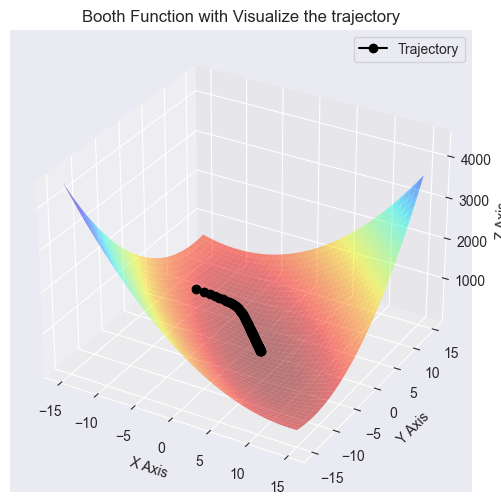

In [5]:
_, _, _, z_val, (x_v, y_v) = gradient_decent_booth(x=-10, y=5, alpha=0.01)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
ax.plot(x_v, y_v, z_val, color='black', marker='o', label='Trajectory')

X = np.linspace(-15, 15, 42)
Y = np.linspace(-15, 15, 42)
X, Y = np.meshgrid(X, Y)
Z = booth(X,Y)

surf = ax.plot_surface(X, Y, Z, cmap='jet_r',
                       linewidth=0, antialiased=True, alpha=0.5)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Booth Function with Visualize the trajectory')

# Update the legend and show the plot
ax.legend()
plt.show()

WITH STEP SIZE CONTROLLER

Converged after 42 iterations.


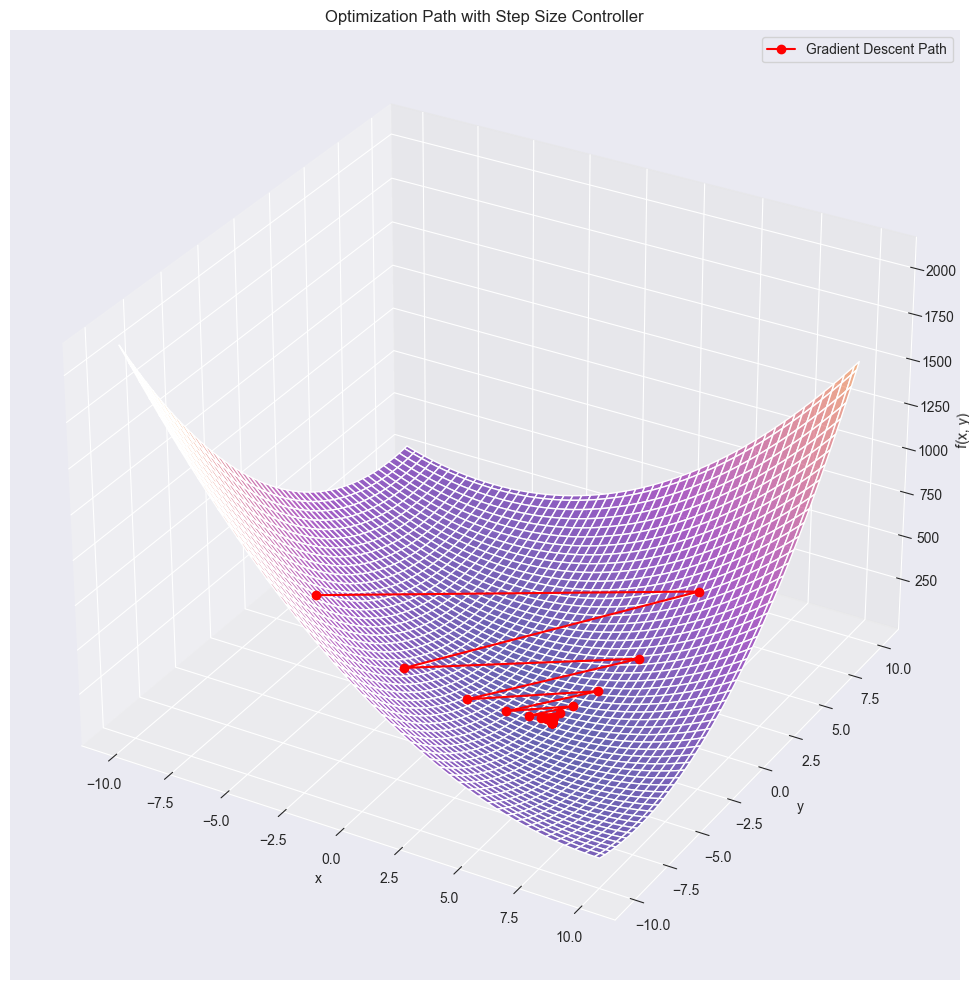

In [10]:
initial_step_size = 0.1  # Initial step size (µ0)
gamma = 0.99  # Decay factor for shrinking step size
epsilon = 1e-6  # Threshold for convergence
imax = 5000  # Maximum number of iterations
x, y = -5, -5  # Initial values

# Storage for visualization
x_traj, y_traj, z_traj = [x], [y], [booth(x, y)]

# Gradient Descent with Step Size Controller
for i in range(imax):
    # Calculate current step size
    step_size = initial_step_size * (gamma ** i)
    
    # Compute the gradient at the current point
    df_dx = derv_fx(x,y)
    df_dy = derv_fy(x, y)
    
    # Update x and y
    x_new = x - step_size * df_dx
    y_new = y - step_size * df_dy
    
    # Calculate function values for convergence check
    f_old = booth(x, y)
    f_new = booth(x_new, y_new)
    
    # Check for convergence based on change in function value
    if abs(f_old - f_new) < epsilon:
        print(f"Converged after {i} iterations.")
        break
    
    # Update x and y with new values
    x, y = x_new, y_new
    x_traj.append(x)
    y_traj.append(y)
    z_traj.append(f_new)

# Plotting the trajectory on the 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = booth(X, Y)
ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.6)
ax.plot(x_traj, y_traj, z_traj, color='red', marker='o', label='Gradient Descent Path')
ax.set_title("Optimization Path with Step Size Controller")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.legend()
plt.tight_layout()
plt.show()

# PART - 2 LINEAR AND LOGISTIC REG #

# A. OPTIMIZATION ROUTINES AND LOSS FUNCTIONS #

1. In this part of the assignment, we learn how to write modular programs and make our code reusable.
For this, declare a class named Optimization which has inputs X and y as the class variables. Next,
implement the following optimization algorithms in this class: <br>
a) Newton’s Method <br>
b) Stochastic gradient descent <br>
2. You will need loss functions and their gradients for the optimization process. Next, implement a class Loss
which also takes in X and y and computes the following losses and their gradients: <br>
a) Mean Square Loss <br>
b) Cross Entropy Loss <br>
Make the Loss class such that you can access it from the Optimization class.

HELPER FUNCTION 

In [83]:
# Helper function
class Functions:
    ## function for random sampling of data
    def random_sampler(self, perc=0.1):
        prop = int(len(self.X)*perc) #proportion of the data to be used for each iteration, here we have set it to 10% of the data
        ind = np.random.choice(range(len(self.X)), prop, replace=False)
        test_ind = list(set(range(len(self.X))) - set(ind)) #for using the rest sample as test set
        return self.X[ind],self.y[ind], self.X[test_ind], self.y[test_ind]
    
    ## funtion for normalizing the features
    def normalize_features(self,X,append=True):
        X = (X - np.mean(X, 0)) / np.std(X, 0) #normalize the features
        if append:
            X = np.append(np.ones(X.shape[0]).reshape(-1,1),X,1) #append column of ones for intercept
        return X
    
    ## for calculating the metrics
    def calculate_metrics(self, y, preds):
        
        ## accuracy is given by
        accuracy = 1-np.sum(np.abs(np.subtract(preds,y)))/len(preds)
        
        ## calculate the True Positives TP
        Tp = np.sum((y == True) & (preds == True))
        
        ## calculate the True Negatives TN
        Tn = np.sum((y == False) & (preds == False))
        
        ## calculate the False Positives FP
        Fp = np.sum((y == False) & (preds == True))
        
        ## calculate the False Negatives FN
        Fn = np.sum((y == True) & (preds == False))
        
        ## calculate the Precision P
        P = Tp/(Tp+Fp)
        
        ## calculate the Recall
        R = Tp/(Tp+Fn)
        
        ## calculate the F1 score
        F = 2/(1/P+1/R)
        
        ## making confusion matrix
        c = np.ones(4)
        c[0],c[1],c[2],c[3] = Tn, Fp, Fn, Tp
        c = c.reshape(2,2)
        
        return accuracy,P,R,F,c

In [84]:
class Optimization(Functions):
    ## initializing class
    def __init__(self, X, y, loss):
        self.X = X
        self.y = y
        self.loss = loss
    
    ## stochastic gradient descent function
    def SGD(self, B, max_iter=1000,tolerance=1e-6,lr=0.001):
        #function for updating parameters using SGD
        loss_list = []
        test_loss_list=[]
        for it in range(max_iter):
            #sample a random x and y batch for training and validation
            x, y, x_test,y_test = self.random_sampler()
            
            #calculating the loss
            curr_loss, derv_loss, _ = self.loss( x, y, B)
            loss_list.append(curr_loss)
            
            curr_loss_test, _, _ = self.loss(x_test, y_test, B)
            test_loss_list.append(curr_loss_test)
            
            #update the betas
            e = lr*derv_loss
            B = B - e
            
            #stop loop once updation becomes insignificant
            if np.all(np.abs(e) < tolerance):
                break
        return B,loss_list,test_loss_list
    """
    def SGD_momentum(self, B, max_iter=1000, tolerance=1e-6, lr=0.001, momentum=0.9):
    loss_list = []
    test_loss_list = []
    v = np.zeros_like(B)  # Initialize velocity term
    
    for it in range(max_iter):
        x, y, x_test, y_test = self.random_sampler()
        
        curr_loss, derv_loss, _ = self.loss(x, y, B)
        loss_list.append(curr_loss)
        
        curr_loss_test, _, _ = self.loss(x_test, y_test, B)
        test_loss_list.append(curr_loss_test)

        # Momentum update
        v = momentum * v + lr * derv_loss
        B = B - v
        
        if np.all(np.abs(v) < tolerance):
            break
            
    return B, loss_list, test_loss_list

    def SGD_adagrad(self, B, max_iter=1000, tolerance=1e-6, lr=0.01, epsilon=1e-8):
    loss_list = []
    test_loss_list = []
    G = np.zeros_like(B)  # Sum of squared gradients
    
    for it in range(max_iter):
        x, y, x_test, y_test = self.random_sampler()
        
        curr_loss, derv_loss, _ = self.loss(x, y, B)
        loss_list.append(curr_loss)
        
        curr_loss_test, _, _ = self.loss(x_test, y_test, B)
        test_loss_list.append(curr_loss_test)

        # Update accumulated squared gradients
        G += derv_loss**2
        
        # Compute adaptive learning rate
        adjusted_lr = lr / (np.sqrt(G) + epsilon)
        
        # Update parameters
        B = B - adjusted_lr * derv_loss
        
        if np.all(np.abs(adjusted_lr * derv_loss) < tolerance):
            break

    return B, loss_list, test_loss_list

    """
    ## Newton Method for Optimization
    def newton(self, B, max_iter=100, tolerance = 1e-4, lr=0.001):
        ## function for updating parameters using newton's method
        loss_list = []
        test_loss_list=[]
        x, y, x_test, y_test = self.random_sampler(perc = 0.80) # use 80-20 in the training too
        
        for it in range(max_iter):
            #calculate training loss
            curr_loss, gradient, hessian = self.loss(x, y, B)
            loss_list.append(curr_loss)
            
            #calculate test loss
            curr_loss_test, _, _ = self.loss(x_test, y_test, B)
            test_loss_list.append(curr_loss_test)
            
            ## newton method
            e = -np.linalg.solve(hessian,gradient)
            B = B + lr*e
            
            #stop loop once updation becomes insignificant
            if np.all(np.abs(e) < tolerance):
                break
                
        return B,loss_list,test_loss_list
    
   
#Loss Class: It returns both the loss and the gradient
class Loss():
    ## mean square error loss which returns loss, first derivative and hessian
    def mean_square_loss(X, y, B):
        # Calculate the Mean Squared Error (MSE) loss
        y_pred = np.matmul(X, B)
        error = y_pred - y
        mse = np.mean(error ** 2)
        
        # Calculate the gradient and hessian for Newton's method
        gradient = 2 * np.matmul(X.T, error) / len(y)
        hessian = 2 * np.matmul(X.T, X) / len(y)
        
        return mse, gradient, hessian

    def mean_square_loss_L1(X, y, B, alpha):
        loss, grad, hessian = Loss.mean_square_loss(X, y, B)
        l1_penalty = alpha * np.sum(np.abs(B))
        l1_grad = alpha * np.sign(B)
        return loss + l1_penalty, grad + l1_grad, hessian
    
    def mean_square_loss_L2(X, y, B, alpha):
        loss, grad, hessian = Loss.mean_square_loss(X, y, B)
        l2_penalty = (alpha / 2) * np.sum(B ** 2)
        l2_grad = alpha * B
        return loss + l2_penalty, grad + l2_grad, hessian + alpha * np.eye(B.shape[0])
    
    def mean_square_loss_elastic_net(X, y, B, alpha, l1_ratio):
        loss_l1, grad_l1, hessian_l1 = Loss.mean_square_loss_L1(X, y, B, alpha * l1_ratio)
        loss_l2, grad_l2, hessian_l2 = Loss.mean_square_loss_L2(X, y, B, alpha * (1 - l1_ratio))
        return loss_l1 + loss_l2, grad_l1 + grad_l2, hessian_l1 + hessian_l2
    
    ## cross entropy loss
    def cross_entropy_loss(self, X, y, B):
        N = len(X)
        p = 1./(1+np.exp(-np.dot(X,B)))
        W = np.diag((p*(1-p)).reshape(-1))
        return (-1/N * (np.dot(y.T,np.log(p))+np.dot(np.transpose(1-y),np.log(1-p))))[0][0], -np.dot(X.T,(y-p)), X.T@W@X
    
    ## L1 Regularized Cross-Entropy Loss (Lasso)
    def cross_entropy_loss_L1(self, X, y, B, alpha):
        """
        L1-regularized cross-entropy loss.
        :param X: Feature matrix
        :param y: Labels
        :param B: Model coefficients
        :param alpha: Regularization strength (L1 penalty)
        """
        loss, grad, hessian = self.cross_entropy_loss(X, y, B)
        l1_penalty = alpha * np.sum(np.abs(B))  # L1 penalty (sum of absolute values)
        l1_grad = alpha * np.sign(B)  # L1 gradient (derivative of absolute function)
        return loss + l1_penalty, grad + l1_grad, hessian  # Hessian remains the same
    
    ## L2 Regularized Cross-Entropy Loss (Ridge)
    def cross_entropy_loss_L2(self, X, y, B, alpha):
        """
        L2-regularized cross-entropy loss.
        :param X: Feature matrix
        :param y: Labels
        :param B: Model coefficients
        :param alpha: Regularization strength (L2 penalty)
        """
        loss, grad, hessian = self.cross_entropy_loss(X, y, B)
        l2_penalty = (alpha / 2) * np.sum(B ** 2)  # L2 penalty (sum of squared values)
        l2_grad = alpha * B  # L2 gradient (derivative of squared term)
        return loss + l2_penalty, grad + l2_grad, hessian + alpha * np.eye(B.shape[0])  # Hessian updated
    
    def cross_entropy_loss_elastic_net(X, y, B, alpha, l1_ratio):
        loss_l1, grad_l1, hessian_l1 = Loss.cross_entropy_loss_L1(X, y, B, alpha * l1_ratio)
        loss_l2, grad_l2, hessian_l2 = Loss.cross_entropy_loss_L2(X, y, B, alpha * (1 - l1_ratio))
        return loss_l1 + loss_l2, grad_l1 + grad_l2, hessian_l1 + hessian_l2

B. LINEAR REGRESSION <br>
In this task, you are given a dataset named regression.csv. Implement a class LinearRegression that has
at least two functions, fit and predict, for fitting a linear regression model and predicting the results. You need
to use the Optimization and Loss classes inside this. Fit a linear regression model using the following: <br>
1. Mean Square Loss and Newton’s Method 

Set the random seed to ensure that your model is reproducible. <br>
In the end, generate the loss trajectory for both training and testing.
While optimizing the loss function for Linear Regression or Logistic Regression, one needs to initialize the
model parameters. It is well known that deep neural networks do not function if the model parameters are
initialized to zero. Why is it so? Does this issue also arise while optimizing the loss function for Linear or
Logistic Regression? Explain.

In [85]:
#Reading the data and splitting it into training and testing set
#np.random.seed(0)
reg_data = pd.read_csv('regression.csv')
X,y = reg_data.iloc[:,:-1],reg_data.iloc[:,-1]
#let's split the data into a training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

EXTRA: To check correlation of the features with target in training data


In [52]:
#to check correlation of the features with target in training data
"""train_df = pd.concat([X_train,y_train],axis=1)
plt.figure(figsize=(12, 8))
corr = train_df.corr()
plt.title("Correlation Matrix")
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()
#to remove least 3 correlated features
least_corr = corr.iloc[:,-1].abs().nsmallest(3).index
X_train = X_train.drop(least_corr, axis=1)
X_test = X_test.drop(least_corr, axis=1)
"""

'train_df = pd.concat([X_train,y_train],axis=1)\nplt.figure(figsize=(12, 8))\ncorr = train_df.corr()\nplt.title("Correlation Matrix")\nplt.imshow(corr, cmap=\'coolwarm\', interpolation=\'none\')\nplt.colorbar()\nplt.xticks(range(len(corr.columns)), corr.columns, rotation=90)\nplt.yticks(range(len(corr.columns)), corr.columns)\nplt.show()\n#to remove least 3 correlated features\nleast_corr = corr.iloc[:,-1].abs().nsmallest(3).index\nX_train = X_train.drop(least_corr, axis=1)\nX_test = X_test.drop(least_corr, axis=1)\n'

In [53]:
#normalizing data
X_train_normalized = Functions().normalize_features(X_train.values)
X_test_normalized = Functions().normalize_features(X_test.values)

In [54]:
class LinearRegression():
    # Initialization of the class
    def __init__(self, X, y):
        self.X = X
        self.y = y.reshape(-1,1) 

    # Function for fitting the model    
    def fit(self, max_iter=100, tolerance=1e-6, lr=0.1):
        # Generate a random Beta matrix for the 1st iteration
        B = np.zeros((self.X.shape[1], 1))

        # Define the optimizer
        optim = Optimization(self.X, self.y, Loss.mean_square_loss)
        
        # Use Newton's method (assuming `newton()` is correctly defined in `Optimization`)
        B, loss, test_loss = optim.newton(B, max_iter, tolerance, lr)
        
        # Store the coefficient matrix
        self.B = B
        return B, loss, test_loss

    # Function to make predictions
    def predict(self, X):
        return np.matmul(X, self.B)

In [55]:
#Fit the model
lin_reg_model=LinearRegression(X_train_normalized,y_train.values)
lin_reg_model_params,train_loss,test_loss = lin_reg_model.fit()

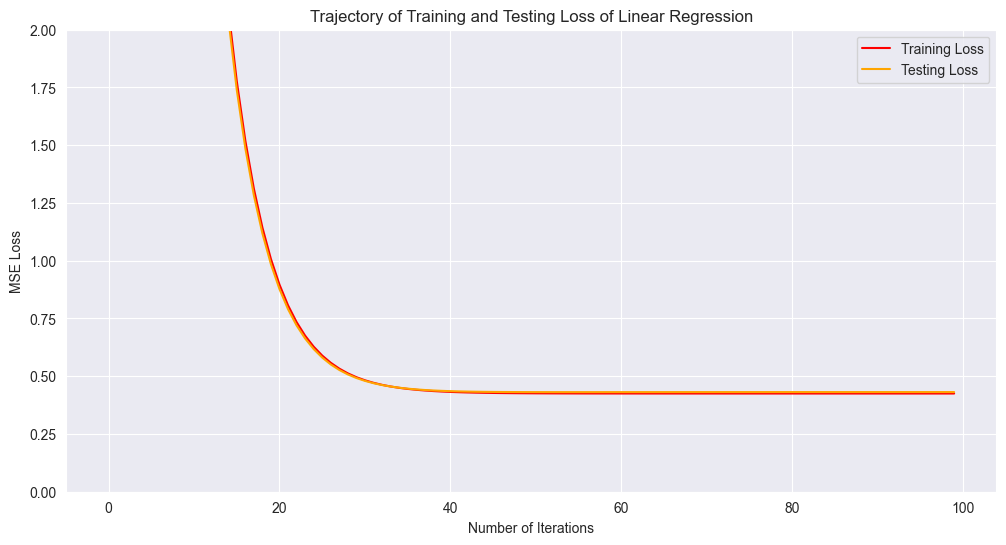

In [56]:
#Drawing the Trajectory of Loss
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(train_loss)),train_loss,color='red',label='Training Loss')
plt.plot(np.arange(len(test_loss)),test_loss,color='orange',label='Testing Loss')
plt.ylim([0,2]);
plt.title('Trajectory of Training and Testing Loss of Linear Regression');
plt.xlabel('Number of Iterations');
plt.ylabel('MSE Loss');
plt.legend();
plt.grid('on');

SKLEARN IMPLEMENTATION

In [57]:
#### Write your code here
from sklearn.linear_model import LinearRegression
sklearn_reg = LinearRegression()
sklearn_reg.fit(X_train_normalized[:,1:],y_train)

LinearRegression()

In [58]:
# Ensure the correct call to the static method
lin_reg_loss, _, _ = Loss.mean_square_loss(X_train_normalized, y_train.values, lin_reg_model_params)
sklearn_reg_loss, _, _ = Loss.mean_square_loss(X_train_normalized, y_train.values, sklearn_reg_params)

print('The loss of our implementation is:', lin_reg_loss)
print('The loss of Sklearn Implementation is:', sklearn_reg_loss)


The loss of our implementation is: 0.8665581893467933
The loss of Sklearn Implementation is: 0.42419115731399015


In [59]:
# To compare the sklearn estimated coefficients and coefficients estimated by us
from sklearn.metrics import mean_absolute_error
mean_absolute_error(sklearn_reg_params,lin_reg_model_params)

0.0247615839869562

While optimizing the loss function for Linear Regression or Logistic Regression, one needs to initialize the
model parameters. It is well known that deep neural networks do not function if the model parameters are
initialized to zero. Why is it so? Does this issue also arise while optimizing the loss function for Linear or
Logistic Regression? Explain.

Answer:
If the weights of a NN is initialized with zero or in fact with any constant value, all the neurons will learn the same features. This will happen because the derivative will remain same for all the weights and there won't be any symmetry breaking. Also, for linear and logistic regression it can cause slow convergence, however, it's not as critical as in deep learning.

LOGISTIC REGRESSION <br>
You are given a file logistic.csv. This part of the assignment involves a classification task. Implement a
class LogisticRegression having at least two functions, fit and predict, for fitting the model and getting the
predictions. Fit a logistic regression model using the following: <br>
1. Cross Entropy Loss and Newton’s Method <br>

Set the random seed to ensure that your model is reproducible.
Report the test accuracy, plot the confusion matrix, and also compute the precision, recall, and F-score. Read
about these parameters. Suppose model A and model B both have the same accuracy, but model B has a higher
F-score. Which model would be more suited? In the end, generate the loss trajectory for both training and
testing.

In [60]:
## reading the data
#np.random.seed(0)
log_reg_data = pd.read_csv('logistic.csv')
#Let's replace the categorical variable with M being 1 and B being 0
log_reg_data['Y'] = log_reg_data['Y'].replace({'M':1,'B':0})
train_df, test_df = train_test_split(log_reg_data, test_size=0.2, random_state=42)
train_df.describe()

/var/folders/38/82cv2qv55wx5swgvs1s3dvp80000gn/T/ipykernel_26920/3514765401.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  log_reg_data['Y'] = log_reg_data['Y'].replace({'M':1,'B':0})


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.371429,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,...,16.235103,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868
std,0.483719,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,...,4.811267,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848
min,0.000000,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,...,13.055000,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050
50%,0.000000,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,...,14.970000,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060
75%,1.000000,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,...,18.410000,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


<Axes: >

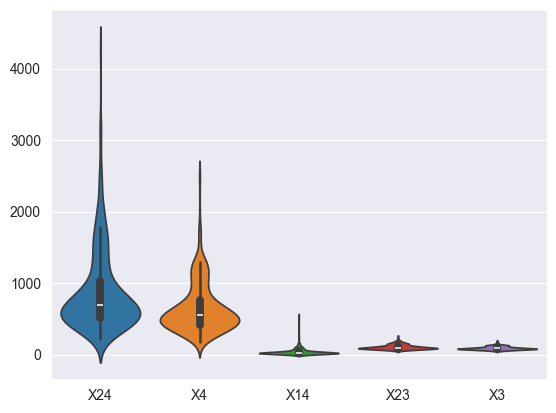

In [61]:
#Violin plot for thr 5 features that have highest standard deviation
std_dev = train_df.std(numeric_only=True).sort_values(ascending=False)[:5]
sns.violinplot(data=train_df[std_dev.index])

Removing outliers using IQR

In [62]:
Q1 = train_df.quantile(0.25,numeric_only=True)
Q3 = train_df.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1 # difference between the third and first quartiles
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [63]:
### Write your code here
class LogisticRegression:
    def __init__(self, X, y):
        self.X = X
        self.y = np.reshape(y, (-1, 1))  # Reshape y directly as a numpy array
        self.B = None

        
    def fit(self, optimizer, max_iter=100, tolerance=1e-6, lr=0.001, reg=None, alpha=0.1):       
        # generate a random Beta matrix for 1st iteration
        B = np.zeros((self.X.shape[1],1)) 
        
        if reg == "L1":
            loss_function = lambda X, y, B: Loss().cross_entropy_loss_L1(X, y, B, alpha)
        elif reg == "L2":
            loss_function = lambda X, y, B: Loss().cross_entropy_loss_L2(X, y, B, alpha)
        else:
            loss_function = lambda X, y, B: Loss().cross_entropy_loss(X, y, B) 
        
        optim = Optimization(self.X, self.y, loss_function)
        
        if optimizer == 'sgd':
            B, loss, test_loss = optim.SGD(B, max_iter, tolerance, lr)
        else:  # Default to Newton's Method
            B, loss, test_loss = optim.newton(B, max_iter, tolerance, lr)
            
        self.B = B
        return B, loss, test_loss
    
    def compute_aic(self, X, y, B):
        N = len(y)
        p = 1 / (1 + np.exp(-np.dot(X, B)))  # Sigmoid function
        log_likelihood = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))  # Cross-entropy loss
        k = len(B)  # Number of parameters
        aic = 2 * k - 2 * log_likelihood
        return aic

    def backward_feature_selection(self, optimizer, max_iter=100, tolerance=1e-6, lr=0.001, reg=None, alpha=0.1):
        current_features = np.arange(self.X.shape[1])  # Initial feature set
        best_aic = float('inf')  # Start with a large AIC
        best_features = current_features
        best_B = None
        
        while len(current_features) > 1:
            aic_values = []
            for feature in current_features:
                reduced_features = np.delete(current_features, np.where(current_features == feature))
                X_reduced = self.X[:, reduced_features]  # Use reduced feature set
                
                # Train model with reduced feature set
                log_reg = LogisticRegression(X_reduced, self.y)
                B, _, _ = log_reg.fit(optimizer=optimizer, max_iter=max_iter, tolerance=tolerance, lr=lr, reg=reg, alpha=alpha)
                
                # Compute AIC
                aic = log_reg.compute_aic(X_reduced, self.y, B)
                aic_values.append(aic)
            
            # Find the feature that leads to the minimum AIC
            min_aic_index = np.argmin(aic_values)
            if aic_values[min_aic_index] < best_aic:
                best_aic = aic_values[min_aic_index]
                best_features = np.delete(current_features, np.where(current_features == current_features[min_aic_index]))
                best_B = B  # Save best parameters
                current_features = best_features  # Update feature set
            else:
                break  # If no improvement in AIC, stop the process
        
        return best_features, best_aic, best_B

    
    def predict(self,X):
        if self.B is None:
            raise ValueError("Model parameters (B) have not been fitted yet.")
        
        scores = np.matmul(X,self.B)
        return 1./(1+np.exp(-scores))

In [86]:
# Splitting data into x and y
X = log_reg_data.iloc[:,1:]
y = log_reg_data.iloc[:,0]
#let's split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalizing the data
X_train_normalized = Functions().normalize_features(X_train)
X_test_normalized = Functions().normalize_features(X_test)
# fitting the model
log_reg_model = LogisticRegression(X_train_normalized,y_train)
log_reg_model_params,train_loss,test_loss = log_reg_model.fit(optimizer='newton')

In [87]:
log_reg_model_preds = log_reg_model.predict(X_test_normalized)
accuracy,P,R,F,c = Functions().calculate_metrics(y_test,(log_reg_model_preds>0.5).reshape(-1))

In [88]:
print('The accuracy of the model is',accuracy)
print('The Precision of the model is',P)
print('The Recall of the model is',R)
print('The F-Score of the model is',F)
print('The Confusion Matrix formed by the model is \n',c)

The accuracy of the model is 0.9298245614035088
The Precision of the model is 0.9487179487179487
The Recall of the model is 0.8604651162790697
The F-Score of the model is 0.9024390243902437
The Confusion Matrix formed by the model is 
 [[69.  2.]
 [ 6. 37.]]


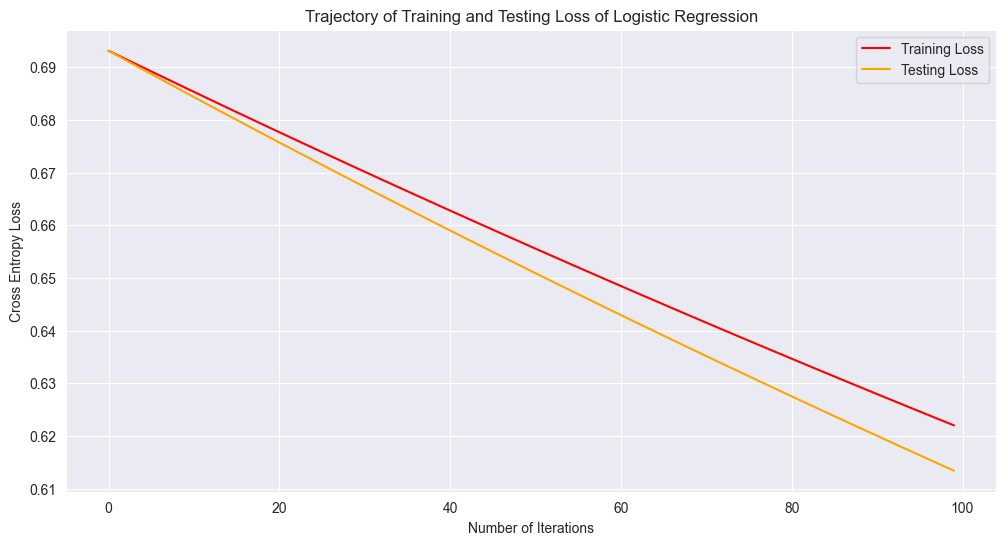

In [89]:
#Trajectory of the Loss
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(train_loss)),train_loss,color='red',label='Training Loss')
plt.plot(np.arange(len(test_loss)),test_loss,color='orange',label='Testing Loss')
plt.title('Trajectory of Training and Testing Loss of Logistic Regression');
plt.xlabel('Number of Iterations');
plt.ylabel('Cross Entropy Loss');
plt.legend();
plt.grid('on');

The model B would be more suited. Even though both models have the same accuracy, model B has a higher F-score. The F-score is a measure of a test's accuracy and considers both the precision and the recall of the test. Precision is the number of true positive results divided by the number of all positive results, while recall is the number of true positive results divided by the number of positive results that should have been returned.

Therefore, a higher F-score suggests that model B has a better balance of precision and recall, making it more reliable in a wider range of situations. This is especially important in cases where false positives and false negatives have different costs.

# REGULARIZATION AND HYPERPARAMETER TUNING #

Fit logistic regression models with the following combinations: <br>
• Cross-Entropy Loss and Stochastic Gradient Descent. <br>
• L1-Regularized Cross-Entropy Loss and Stochastic Gradient Descent. <br>
• L2-Regularized Cross-Entropy Loss and Stochastic Gradient Descent.

The loss trajectories for both training and testing sets for all cases.

Fitting Logistic Regression with Cross-Entropy Loss and SGD...
Fitting Logistic Regression with L1-Regularized Cross-Entropy Loss and SGD...
Fitting Logistic Regression with L2-Regularized Cross-Entropy Loss and SGD...


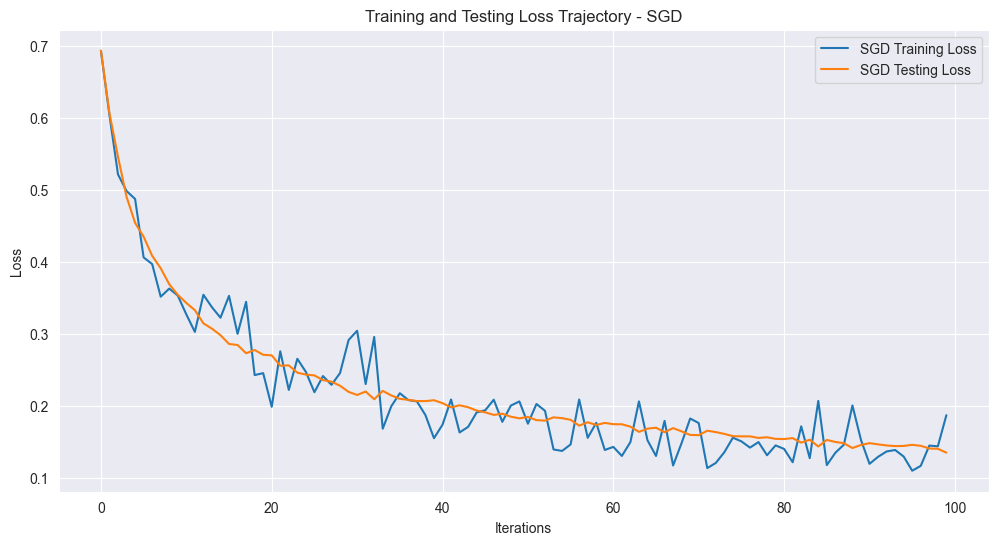

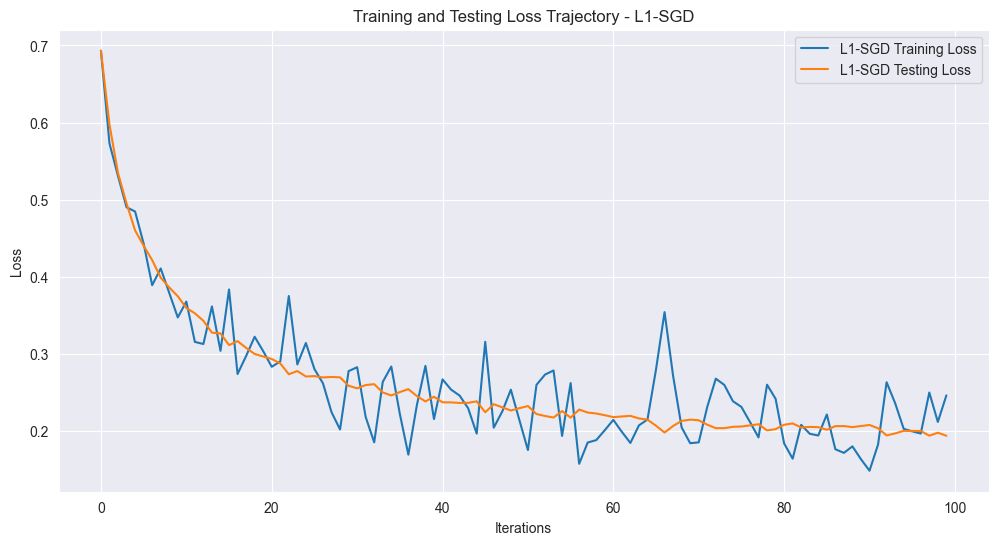

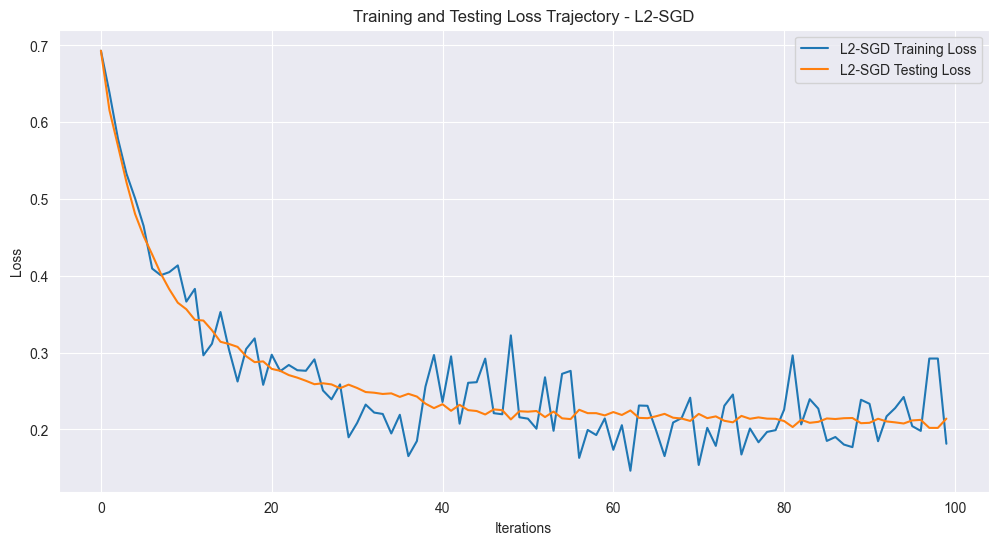

In [90]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Fitting the models
print("Fitting Logistic Regression with Cross-Entropy Loss and SGD...")
log_reg_sgd = LogisticRegression(X_train_normalized, y_train)
log_reg_sgd_params, train_loss_sgd, test_loss_sgd = log_reg_sgd.fit(optimizer='sgd')

print("Fitting Logistic Regression with L1-Regularized Cross-Entropy Loss and SGD...")
log_reg_l1_sgd = LogisticRegression(X_train_normalized, y_train)
log_reg_l1_sgd_params, train_loss_l1_sgd, test_loss_l1_sgd = log_reg_l1_sgd.fit(optimizer='sgd', reg='L1', alpha=0.01)

print("Fitting Logistic Regression with L2-Regularized Cross-Entropy Loss and SGD...")
log_reg_l2_sgd = LogisticRegression(X_train_normalized, y_train)
log_reg_l2_sgd_params, train_loss_l2_sgd, test_loss_l2_sgd = log_reg_l2_sgd.fit(optimizer='sgd', reg='L2', alpha=0.1)

# Predictions
log_reg_preds = (log_reg_sgd.predict(X_test_normalized) > 0.5).astype(int)
log_reg_l1_preds = (log_reg_l1_sgd.predict(X_test_normalized) > 0.5).astype(int)
log_reg_l2_preds = (log_reg_l2_sgd.predict(X_test_normalized) > 0.5).astype(int)

# 1. Loss Trajectory (Training and Testing Sets)
plt.figure(figsize=(12, 6))
plt.plot(train_loss_sgd, label='SGD Training Loss')
plt.plot(test_loss_sgd, label='SGD Testing Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Trajectory - SGD')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_loss_l1_sgd, label='L1-SGD Training Loss')
plt.plot(test_loss_l1_sgd, label='L1-SGD Testing Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Trajectory - L1-SGD')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_loss_l2_sgd, label='L2-SGD Training Loss')
plt.plot(test_loss_l2_sgd, label='L2-SGD Testing Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Trajectory - L2-SGD')
plt.legend()
plt.show()

The final train and test accuracies for all models. <br>
• Generate a confusion matrix for the test set to show the following metrics (Only for the Cross-Entropy and Stochastic Gradient Descent): <br>
– True Positives (TP) <br>
– True Negatives (TN) <br>
– False Positives (FP) <br>
– False Negatives (FN) <br>

In [91]:
# Ensure predictions are binary (0 or 1)
train_preds_sgd = (log_reg_sgd.predict(X_train_normalized) > 0.5).astype(int).ravel()
train_preds_l1_sgd = (log_reg_l1_sgd.predict(X_train_normalized) > 0.5).astype(int).ravel()
train_preds_l2_sgd = (log_reg_l2_sgd.predict(X_train_normalized) > 0.5).astype(int).ravel()

# Flatten y_train if it is not already a 1D array
y_train = y_train.ravel()

# Calculate the accuracies for each model
train_acc_sgd = (train_preds_sgd == y_train).mean()
train_acc_l1_sgd = (train_preds_l1_sgd == y_train).mean()
train_acc_l2_sgd = (train_preds_l2_sgd == y_train).mean()

test_preds_sgd = (log_reg_sgd.predict(X_test_normalized) > 0.5).astype(int).ravel()
test_preds_l1_sgd = (log_reg_l1_sgd.predict(X_test_normalized) > 0.5).astype(int).ravel()
test_preds_l2_sgd = (log_reg_l2_sgd.predict(X_test_normalized) > 0.5).astype(int).ravel()

# Calculate test accuracies
test_acc_sgd = (test_preds_sgd == y_test).mean()
test_acc_l1_sgd = (test_preds_l1_sgd == y_test).mean()
test_acc_l2_sgd = (test_preds_l2_sgd == y_test).mean()

# Displaying the final accuracies
print(f"Train Accuracy (SGD): {train_acc_sgd}")
print(f"Train Accuracy (L1-SGD): {train_acc_l1_sgd}")
print(f"Train Accuracy (L2-SGD): {train_acc_l2_sgd}")
print(f"Test Accuracy (SGD): {test_acc_sgd}")
print(f"Test Accuracy (L1-SGD): {test_acc_l1_sgd}")
print(f"Test Accuracy (L2-SGD): {test_acc_l2_sgd}")

# Confusion Matrix for the Cross-Entropy and SGD Model
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Test Set (SGD Model)
cm_test_sgd = confusion_matrix(y_test, test_preds_sgd)
TP_test_sgd, FP_test_sgd, FN_test_sgd, TN_test_sgd = cm_test_sgd.ravel()

# Confusion Matrix for Test Set (L1 Regularized SGD)
cm_test_l1_sgd = confusion_matrix(y_test, test_preds_l1_sgd)
TP_test_l1_sgd, FP_test_l1_sgd, FN_test_l1_sgd, TN_test_l1_sgd = cm_test_l1_sgd.ravel()

# Confusion Matrix for Test Set (L2 Regularized SGD)
cm_test_l2_sgd = confusion_matrix(y_test, test_preds_l2_sgd)
TP_test_l2_sgd, FP_test_l2_sgd, FN_test_l2_sgd, TN_test_l2_sgd = cm_test_l2_sgd.ravel()

# Displaying the Confusion Matrices and Metrics
print("\nConfusion Matrix (SGD) - Test Set:")
print(f"True Positives (TP): {TP_test_sgd}, True Negatives (TN): {TN_test_sgd}")
print(f"False Positives (FP): {FP_test_sgd}, False Negatives (FN): {FN_test_sgd}")

print("\nConfusion Matrix (L1-SGD) - Test Set:")
print(f"True Positives (TP): {TP_test_l1_sgd}, True Negatives (TN): {TN_test_l1_sgd}")
print(f"False Positives (FP): {FP_test_l1_sgd}, False Negatives (FN): {FN_test_l1_sgd}")

print("\nConfusion Matrix (L2-SGD) - Test Set:")
print(f"True Positives (TP): {TP_test_l2_sgd}, True Negatives (TN): {TN_test_l2_sgd}")
print(f"False Positives (FP): {FP_test_l2_sgd}, False Negatives (FN): {FN_test_l2_sgd}")


Train Accuracy (SGD): 0.9692307692307692
Train Accuracy (L1-SGD): 0.9692307692307692
Train Accuracy (L2-SGD): 0.967032967032967
Test Accuracy (SGD): 0.9912280701754386
Test Accuracy (L1-SGD): 0.9824561403508771
Test Accuracy (L2-SGD): 0.9824561403508771

Confusion Matrix (SGD) - Test Set:
True Positives (TP): 71, True Negatives (TN): 42
False Positives (FP): 0, False Negatives (FN): 1

Confusion Matrix (L1-SGD) - Test Set:
True Positives (TP): 71, True Negatives (TN): 41
False Positives (FP): 0, False Negatives (FN): 2

Confusion Matrix (L2-SGD) - Test Set:
True Positives (TP): 71, True Negatives (TN): 41
False Positives (FP): 0, False Negatives (FN): 2


/var/folders/38/82cv2qv55wx5swgvs1s3dvp80000gn/T/ipykernel_26920/1401762193.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()


Perform Backward Feature Selection iteratively using the AIC Metric: <br>
• Apply this only to the combination of Cross-Entropy Loss and SGD. <br>
• Select the most important features based on AIC.

In [92]:
log_reg_model = LogisticRegression(X_train_normalized, y_train)
best_features, best_aic, best_B = log_reg_model.backward_feature_selection(optimizer='sgd', max_iter=100, tolerance=1e-6, lr=0.001)

print(f"Best feature set: {best_features}")
print(f"Best AIC: {best_aic}")

Best feature set: [12]
Best AIC: 0.6136818859527906


# BIC Metric Feature Selection code (EXTRA) #

In [93]:
"""
class LogisticRegressionWithBIC:
    def __init__(self):
        self.J_hist = []  # Initialize an empty list to store training loss history
        self.theta_val = []

    def compute_bic(self, x, y, theta, num_features):
        # Compute the predicted probabilities
        p = 1 / (1 + np.exp(-x @ theta))  # Sigmoid function
        # Compute the cross-entropy loss (which corresponds to -log-likelihood)
        loss = -1 / len(y) * (y.T @ np.log(p) + (1 - y).T @ np.log(1 - p))
        # The number of parameters (features) is the length of theta
        k = num_features + 1  # Including the intercept term
        # Log-likelihood is simply the negative of the loss
        log_likelihood = -loss
        # BIC formula: BIC = ln(n)k - 2 * log(L)
        n = len(y)  # Number of data points
        bic = np.log(n) * k - 2 * log_likelihood
        return bic

    def fit(self, x, y, learning_rate=0.01, max_iter=100, batch_size=100, tolerance=1e-5, optimizer='SGD', l1_lambda=0, l2_lambda=0):
        theta0 = np.zeros((x.shape[1], 1))

        optimization = Optimization(x, y, loss=Loss.cross_entropy)

        # Train the model using SGD
        if optimizer == 'SGD':
            J_hist, theta_val, theta = optimization.min_sgd(mu=learning_rate, C=batch_size, K=max_iter, epsilon=tolerance, l1_lambda=l1_lambda, l2_lambda=l2_lambda)

        elif optimizer == 'Newton':
            J_hist, theta_val, theta = optimization.min_newton(mu=learning_rate, K=max_iter, epsilon=tolerance, l1_lambda=l1_lambda, l2_lambda=l2_lambda)

        else:
            raise Exception("Wrong Optimizer")

        self.J_hist = J_hist  # This will be used for plotting the training curve
        self.theta_val = theta_val  # Store theta values across iterations
        self.theta = theta
        return theta

    def backward_feature_selection(self, x, y, learning_rate=0.01, max_iter=100, batch_size=100, tolerance=1e-5, l1_lambda=0, l2_lambda=0):
        current_features = np.arange(x.shape[1])  # List of current features
        best_bic = float('inf')  # Initialize with a large BIC
        best_theta = None
        best_features = current_features

        while len(current_features) > 1:
            bic_values = []
            for feature in current_features:
                # Create a new feature set without the current feature
                reduced_features = np.delete(current_features, np.where(current_features == feature))
                x_reduced = x[:, reduced_features]

                # Fit the model with the reduced feature set
                self.fit(x_reduced, y, learning_rate, max_iter, batch_size, tolerance, optimizer='SGD', l1_lambda=l1_lambda, l2_lambda=l2_lambda)

                # Compute BIC for the current model
                bic = self.compute_bic(x_reduced, y, self.theta, len(reduced_features))
                bic_values.append(bic)

            # Find the feature that gives the minimum BIC
            best_feature_index = np.argmin(bic_values)
            best_bic_in_round = bic_values[best_feature_index]

            if best_bic_in_round < best_bic:
                best_bic = best_bic_in_round
                best_features = np.delete(current_features, np.where(current_features == current_features[best_feature_index]))
                # Update the current feature set by removing the least significant feature
                current_features = best_features
            else:
                # If no feature improves BIC, break the loop
                break

        return best_features, best_bic, self.theta

"""

'\nclass LogisticRegressionWithBIC:\n    def __init__(self):\n        self.J_hist = []  # Initialize an empty list to store training loss history\n        self.theta_val = []\n\n    def compute_bic(self, x, y, theta, num_features):\n        # Compute the predicted probabilities\n        p = 1 / (1 + np.exp(-x @ theta))  # Sigmoid function\n        # Compute the cross-entropy loss (which corresponds to -log-likelihood)\n        loss = -1 / len(y) * (y.T @ np.log(p) + (1 - y).T @ np.log(1 - p))\n        # The number of parameters (features) is the length of theta\n        k = num_features + 1  # Including the intercept term\n        # Log-likelihood is simply the negative of the loss\n        log_likelihood = -loss\n        # BIC formula: BIC = ln(n)k - 2 * log(L)\n        n = len(y)  # Number of data points\n        bic = np.log(n) * k - 2 * log_likelihood\n        return bic\n\n    def fit(self, x, y, learning_rate=0.01, max_iter=100, batch_size=100, tolerance=1e-5, optimizer=\'SGD\', 

# K FOLD CROSS VALIDATION #

In this part of the assignment, you will implement Grid Search with K-Fold Cross-Validation for model selection, i.e., for choosing the best hyperparameters. <br>
A) Use k = 3 folds for validation and implement the L2-regularized cross-entropy loss with gradient descent and fixed step-length control. Identify the optimal L2-regularization parameter λ and step length α. <br>
B) Keep track of the mean performance (e.g., accuracy) across the k folds for each combination of hyperparameters. <br>
C) Plot a grid of α vs λ with the accuracy score for all combinations. You may use a 3D plot, with axes as α, λ, and accuracy. <br>
D) Using the optimal values of α and λ, train your model on the complete training data and evaluate its performance on the test data. Report the final accuracy.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#psuedocode and code in photo 21.11.2024
##%%
data = pd.read_csv('logistic.csv')

# Mapping the class labels 'M' -> 1 and 'B' -> 0
data['Y'] = data['Y'].map({'M': 1, 'B': 0})

# Separate features (X) and target (y)
X = data.drop(columns=['Y']).values  # All columns except 'Y'
y = data['Y'].values  # The target column

# Add a bias column (column of ones) for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Split into training and test sets (80% training, 20% testing)
train_size = int(0.8 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [100]:
def k_fold_cross_validation(X, y, model, l2_lambda, learning_rate, k=3, max_iter=100):
    # Manually split the data into k folds
    fold_size = len(X) // k
    accuracies = []
    
    for fold in range(k):
        # Create training and validation splits
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size
        X_val = X[val_start:val_end]
        y_val = y[val_start:val_end]
        
        X_train = np.concatenate([X[:val_start], X[val_end:]])
        y_train = np.concatenate([y[:val_start], y[val_end:]])
        
        # Train the model on the training data
        model.fit(X_train, y_train, learning_rate=learning_rate, max_iter=max_iter, l2_lambda=l2_lambda)
        
        # Calculate accuracy on the validation set
        accuracy = model.accuracy(X_val, y_val)
        accuracies.append(accuracy)
    
    # Return the mean accuracy across the k folds
    return np.mean(accuracies)

In [101]:
# Another way to code L2 regularization
class LogisticRegressionWithL2:
    def __init__(self):
        self.theta = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X_train, y_train, learning_rate=0.0001, max_iter=100, l2_lambda=0.1):
        m, n = X_train.shape  # m = number of samples, n = number of features
        theta = np.zeros((n, 1))  # Initialize theta (shape: (n, 1))
        
        # Convert y_train to a column vector if it's a 1D array
        if y_train.ndim == 1:
            y_train = y_train.reshape(-1, 1)
        
        for i in range(max_iter):
            # Compute the predictions 
            p = self.sigmoid(X_train @ theta)  # p -> (m, 1)
            
            # Compute the gradient 
            gradient = (1 / m) * X_train.T @ (p - y_train)  # gradient -> (n, 1)
            
            # Apply L2 regularization to the weights (not the bias term)
            gradient[1:] += (l2_lambda / m) * theta[1:]  # Regularize weights (excluding theta[0])
            
            # Update the weights using gradient descent
            theta -= learning_rate * gradient  # theta -> (n, 1)
            # print(f"Shape of X_train: {X_train.shape}")
            # print(f"Shape of y_train: {y_train.shape}")
            # print(f"Shape of theta: {theta.shape}")
            # print(f"Shape of gradient: {gradient.shape}")
        self.theta = theta
        return self

    def predict(self, X):
        # Predict using the trained model
        p = self.sigmoid(X @ self.theta)
        return (p >= 0.5).astype(int)  # Return 0 or 1 based on threshold 0.5
    
    def accuracy(self, X, y):
        # Calculate accuracy of the model
        predictions = self.predict(X)
        return np.mean(predictions.flatten() == y)  # Compare predicted labels to true labels


In [102]:
def grid_search(X, y, alpha_values, lambda_values, k=3, max_iter=100):
    best_accuracy = 0
    best_alpha = None
    best_lambda = None
    
    # Store results for grid search
    results = []
    
    # Iterate through each combination of alpha (learning rate) and lambda (regularization strength)
    for alpha in alpha_values:
        for l2_lambda in lambda_values:
            model = LogisticRegressionWithL2()
            
            # Perform k-fold cross-validation
            mean_accuracy = k_fold_cross_validation(X, y, model, l2_lambda, alpha, k, max_iter)
            
            # Track the best result
            results.append((alpha, l2_lambda, mean_accuracy))
            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_alpha = alpha
                best_lambda = l2_lambda
    
    return results, best_alpha, best_lambda, best_accuracy


In [103]:
from mpl_toolkits.mplot3d import Axes3D
def plot_grid_search_results(results, alpha_values, lambda_values):
    # Convert results to numpy array
    results_array = np.array(results)
    
    # Extract accuracy values
    accuracy_grid = results_array[:, 2].reshape(len(lambda_values), len(alpha_values))
    
    # Create a meshgrid for alpha and lambda
    alpha_grid, lambda_grid = np.meshgrid(alpha_values, lambda_values)
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(alpha_grid, lambda_grid, accuracy_grid, cmap='viridis', alpha=0.5)
    
    # Set labels
    ax.set_xlabel('Alpha (α)')
    ax.set_ylabel('Lambda (λ)')
    ax.set_zlabel('Accuracy')
    ax.set_title('Grid Search: α vs λ vs Accuracy')
    
    plt.tight_layout()
    plt.show()

In [109]:
from mpl_toolkits.mplot3d import Axes3D

def plot_grid_search_results(results, alpha_values, lambda_values):
    # Convert results to numpy array
    results_array = np.array(results)
    
    # Extract accuracy values
    accuracy_grid = results_array[:, 2].reshape(len(lambda_values), len(alpha_values))
    
    # Create a meshgrid for alpha and lambda
    alpha_grid, lambda_grid = np.meshgrid(alpha_values, lambda_values)
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(alpha_grid, lambda_grid, accuracy_grid, cmap='viridis', alpha=0.5)
    
    # Set labels
    ax.set_xlabel('Alpha (α)')
    ax.set_ylabel('Lambda (λ)')
    ax.set_zlabel('Accuracy')
    ax.set_title('Grid Search: α vs λ vs Accuracy')
    
    plt.tight_layout()
    plt.show()

/var/folders/38/82cv2qv55wx5swgvs1s3dvp80000gn/T/ipykernel_26920/375957116.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Best Alpha: 1.5
Best Lambda: 1
Best Mean Accuracy: 0.70


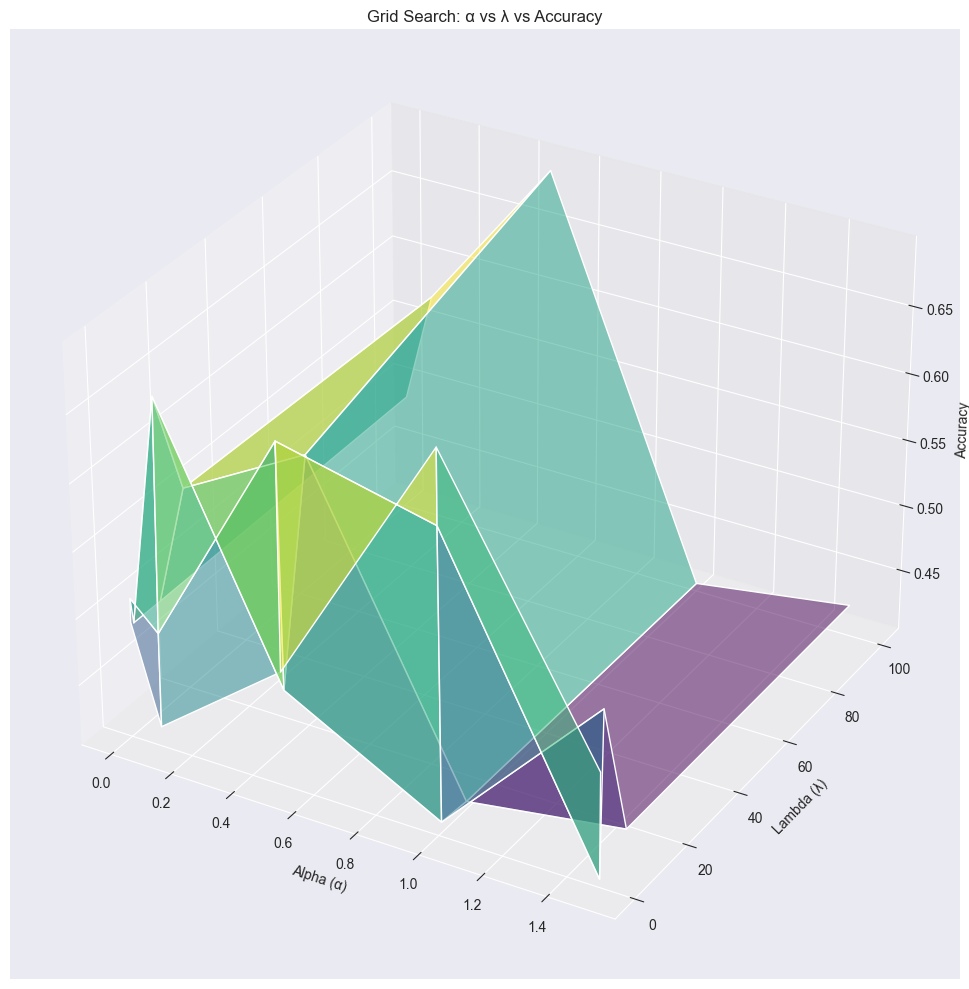

Test Accuracy with Best Hyperparameters: 22.81%


In [110]:
# Hyperparameter values to test
alpha_values = [0.01, 0.1, 0.5, 1, 1.5]
lambda_values = [0.01, 0.1, 1, 10, 100]

# Perform Grid Search with K-fold Cross-Validation
results, best_alpha, best_lambda, best_accuracy = grid_search(X_train, y_train, alpha_values, lambda_values, k=3)

# Print the best hyperparameters
print(f"Best Alpha: {best_alpha}")
print(f"Best Lambda: {best_lambda}")
print(f"Best Mean Accuracy: {best_accuracy:.2f}")

# Plot the grid search results
plot_grid_search_results(results, alpha_values, lambda_values)

# Final model training with the best hyperparameters
final_model = LogisticRegressionWithL2()
final_model.fit(X_train, y_train, learning_rate=best_alpha, max_iter=100, l2_lambda=best_lambda)

# Evaluate on test set
test_accuracy = final_model.accuracy(X_test, y_test)
print(f"Test Accuracy with Best Hyperparameters: {test_accuracy * 100:.2f}%")

 # Coordinate Descent for L1-Regularized Linear Regression #

You are provided with a dataset named ’regression2.csv’ <br>
A) Implement the L1-regularized linear regression loss function in Python. <br>
B) Using only NumPy, implement the Coordinate Descent algorithm to minimize the L1-regularized linear regression loss function. <br>
C) Visualize the change of each coefficient over iterations

In [104]:
import numpy as np

def l1_regularized_loss(X, y, beta, lambda_reg):
    # Prediction and residual calculation
    residuals = y - X @ beta
    # Loss calculation (RSS + L1 penalty)
    rss_loss = np.sum(residuals ** 2)
    l1_penalty = lambda_reg * np.sum(np.abs(beta))
    return rss_loss + l1_penalty


In [105]:
# The soft-thresholding function
def soft_threshold(z, gamma):
    if z > gamma:
        return z - gamma
    elif z < -gamma:
        return z + gamma
    else:
        return 0

# The coordinate descent function for L1-regularized regression (Lasso)
def coordinate_descent_lasso(X, y, lambda_reg, max_iter=100, tol=1e-4):
    m, n = X.shape  # m: number of samples, n: number of features
    beta = np.zeros(n)  # Initialize beta coefficients to zero
    beta_history = [beta.copy()]  # To store beta values at each iteration for tracking
    
    for iteration in range(max_iter):
        beta_old = beta.copy()
        
        # Iterate over each feature (coordinate) to update it
        for j in range(n):
            # Calculate rho for the j-th coefficient (excluding j-th feature's effect)
            residual = y - X @ beta + X[:, j] * beta[j]
            rho = X[:, j].T @ residual #This computes rho as the correlation between the residual and the feature j. It represents the gradient (direction and amount) by which we need to adjust beta[j] based on how much it contributes to minimizing the error in predicting y.
            
            # Update beta_j using soft-thresholding
            beta[j] = soft_threshold(rho / (X[:, j].T @ X[:, j]), lambda_reg / (2 * (X[:, j].T @ X[:, j])))
        
        # Store the updated beta values for each iteration
        beta_history.append(beta.copy())
        
        # Check for convergence
        if np.max(np.abs(beta - beta_old)) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break
            
    return beta, np.array(beta_history)

In [106]:
import matplotlib.pyplot as plt

def plot_coefficients(beta_history):
    beta_history = np.array(beta_history)
    plt.figure(figsize=(10, 6))
    for i in range(beta_history.shape[1]):
        plt.plot(beta_history[:, i], label=f'Coefficient {i+1}')
    plt.xlabel('Iterations')
    plt.ylabel('Coefficient values')
    plt.title('Change in Coefficients Over Iterations')
    plt.legend()
    plt.show()


Converged after 64 iterations.


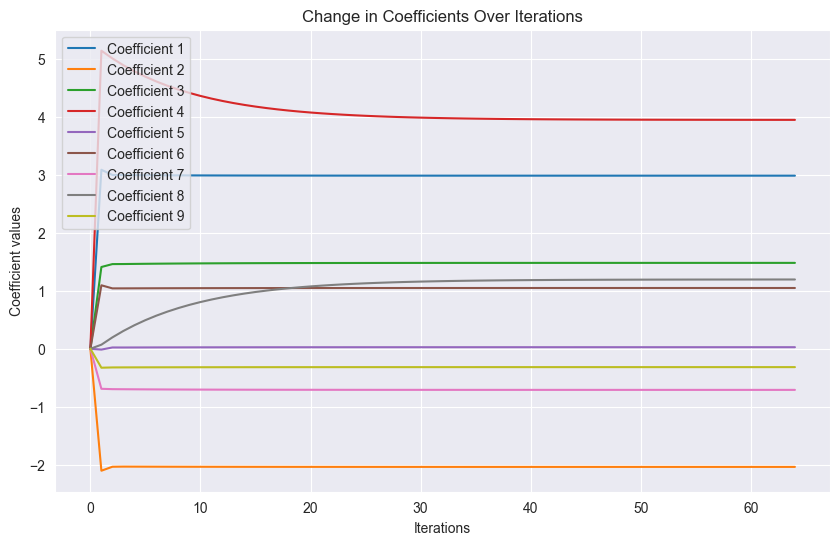

In [108]:
import pandas as pd

# Load the data
data = pd.read_csv('ex4_regression.csv')
X = data.iloc[:, :-1].values  # all columns except the last
y = data.iloc[:, -1].values   # last column

# Standardize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Set regularization parameter
lambda_reg = 0.1

# Run coordinate descent Lasso
beta, beta_history = coordinate_descent_lasso(X, y, lambda_reg)

# Plot coefficient change over iterations
plot_coefficients(beta_history)
